In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import pickle

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import os.path as osp 
import os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, OneHotEncoder
)
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel #para seleccionar los coeficientes de lasso
from sklearn.metrics import roc_auc_score, f1_score
from sklearn import set_config
set_config(display="diagram")

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events

import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fa-ii-2024-ii-flujos-de-modelos-tradicionales/df_test.parquet
/kaggle/input/fa-ii-2024-ii-flujos-de-modelos-tradicionales/Diccionario_.xlsx
/kaggle/input/fa-ii-2024-ii-flujos-de-modelos-tradicionales/df_train.parquet
/kaggle/input/fa-ii-2024-ii-flujos-de-modelos-tradicionales/archive/sample_submission.csv
/kaggle/input/fa-ii-2024-ii-flujos-de-modelos-tradicionales/archive/Diccionario.xlsx
/kaggle/input/fa-ii-2024-ii-flujos-de-modelos-tradicionales/archive/df_test.parquet
/kaggle/input/fa-ii-2024-ii-flujos-de-modelos-tradicionales/archive/df_train.parquet


In [4]:
DATA_DIR = "/kaggle/input/fa-ii-2024-ii-flujos-de-modelos-tradicionales/"
df = pd.read_parquet(osp.join(DATA_DIR, "df_train.parquet"))
df

,MEDICAMENTOS,MEDICINA ESPECIALIZADA,MEDICINA GENERAL,Cant_gr_flia,Cant_riesgos_flia_mean,min_Tiempo_CP_Fliar,Cant_Fliar_CP,psa_max_gr_flia,psa_min_gr_flia,Cant_Fliar_riesgos,...,CORONARIOS_FAMILIAR,CEREBRAL,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL,ENFERMEDAD_RENAL_FAMILIAR,OTROS_ANTECEDENTES_VASCULARES,Target,Pendiente,Intercepto,Promedio_costo
ID,,,,,,,,,,,,,,,,,,,,,
63021,2.0,1.0,1.0,3,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,6859.142857,108.000000,48230.000000
22617,9.0,0.0,1.0,4,0.000000,NaN,0.0,NaN,NaN,0.0,...,2,2,2,2,2,2,0,8102.000000,64.666667,56843.333333
37675,11.0,0.0,2.0,3,0.333333,NaN,0.0,NaN,NaN,1.0,...,0,0,0,0,0,0,1,-994.000000,23417.333333,19938.333333
16596,0.0,0.0,0.0,3,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,-0.028571,0.266667,1.000000
18673,1.0,1.0,1.0,3,0.000000,NaN,0.0,NaN,NaN,0.0,...,0,1,0,1,0,1,0,5968.571429,-13926.666667,41780.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24219,0.0,0.0,0.0,2,0.500000,NaN,0.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0,360.942857,842.200000,12633.000000
5657,10.0,0.0,0.0,1,1.000000,NaN,0.0,NaN,NaN,1.0,...,2,2,2,2,2,2,0,-5931.371429,45382.800000,49246.000000
24707,0.0,1.0,1.0,2,0.000000,NaN,0.0,NaN,NaN,0.0,...,2,2,2,2,2,2,0,20993.914286,-32657.200000,244929.000000


In [6]:
DATA_DIR = "/kaggle/input/fa-ii-2024-ii-flujos-de-modelos-tradicionales/"
df1 = pd.read_parquet(osp.join(DATA_DIR, "df_test.parquet"))
df1

,MEDICAMENTOS,MEDICINA ESPECIALIZADA,MEDICINA GENERAL,Cant_gr_flia,Cant_riesgos_flia_mean,min_Tiempo_CP_Fliar,Cant_Fliar_CP,psa_max_gr_flia,psa_min_gr_flia,Cant_Fliar_riesgos,...,CORONARIOS,CORONARIOS_FAMILIAR,CEREBRAL,CEREBRAL_FAMILIAR,ENFERMEDAD_RENAL,ENFERMEDAD_RENAL_FAMILIAR,OTROS_ANTECEDENTES_VASCULARES,Pendiente,Intercepto,Promedio_costo
ID,,,,,,,,,,,,,,,,,,,,,
62460,18.0,1.0,5.0,2,0.5,NaN,0.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0,10110.771429,5.101980e+04,8.640750e+04
61604,7.0,8.0,2.0,4,0.0,NaN,0.0,NaN,NaN,0.0,...,1,1,0,0,0,0,0,-177356.057143,1.663948e+06,1.251842e+06
4578,0.0,0.0,2.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,405126.428571,-9.452950e+05,2.835885e+06
53549,0.0,7.0,0.0,1,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,-633444.085714,3.450246e+06,1.233192e+06
47310,36.0,3.0,1.0,1,1.0,NaN,0.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0,77731.571429,3.687650e+05,6.408255e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23350,1.0,0.0,0.0,1,1.0,NaN,0.0,NaN,NaN,1.0,...,2,2,2,2,2,2,2,22747.857143,-5.307833e+04,1.592350e+05
55018,8.0,6.0,1.0,3,0.0,NaN,0.0,NaN,NaN,0.0,...,1,1,0,0,0,0,0,14190.428571,5.433333e+01,4.972083e+04
62632,8.0,4.0,0.0,2,0.0,NaN,0.0,NaN,NaN,0.0,...,0,0,0,0,0,0,0,-44830.285714,2.350993e+05,9.383200e+04


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10069 entries, 62460 to 1537
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MEDICAMENTOS                   10069 non-null  float64
 1   MEDICINA ESPECIALIZADA         10069 non-null  float64
 2   MEDICINA GENERAL               10069 non-null  float64
 3   Cant_gr_flia                   10069 non-null  int64  
 4   Cant_riesgos_flia_mean         10069 non-null  float64
 5   min_Tiempo_CP_Fliar            2 non-null      float64
 6   Cant_Fliar_CP                  10069 non-null  float64
 7   psa_max_gr_flia                77 non-null     float64
 8   psa_min_gr_flia                77 non-null     float64
 9   Cant_Fliar_riesgos             10069 non-null  float64
 10  cantidad_serv_flia             10069 non-null  float64
 11  Pendiente_flia                 10069 non-null  float64
 12  Intercepto_flia                10069 non-null  f

In [9]:
X, y = df.drop(columns="Target"), df["Target"]
y.value_counts(True) * 100

Target
0    71.537414
1    28.462586
Name: proportion, dtype: float64

In [10]:
porcetaje_de_nulidad = (
    X.isnull()
    .apply(lambda s: s.value_counts(True)).T
) 

porcetaje_de_nulidad.columns = ['not_null', 'null']
variables_muy_nulas = porcetaje_de_nulidad.query('null > 0.7').index

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [13]:
numericas = X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19969 entries, 32051 to 39760
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   MEDICAMENTOS                   19969 non-null  float64
 1   MEDICINA ESPECIALIZADA         19969 non-null  float64
 2   MEDICINA GENERAL               19969 non-null  float64
 3   Cant_gr_flia                   19969 non-null  int64  
 4   Cant_riesgos_flia_mean         19969 non-null  float64
 5   min_Tiempo_CP_Fliar            8 non-null      float64
 6   Cant_Fliar_CP                  19969 non-null  float64
 7   psa_max_gr_flia                142 non-null    float64
 8   psa_min_gr_flia                142 non-null    float64
 9   Cant_Fliar_riesgos             19969 non-null  float64
 10  cantidad_serv_flia             19969 non-null  float64
 11  Pendiente_flia                 19969 non-null  float64
 12  Intercepto_flia                19969 non-null  

In [17]:
var_numericas = X_train.select_dtypes('number').columns
var_categoricas = X_train.select_dtypes('object').columns

In [8]:
columnas_numerico=['MULTI_CANCER','RIESGOS','CESION','CANCER_MAMA_FAMILIAR','CANCER_OTRO_SITIO','CANCER_OTRO_SITIO_FAMILIAR','CEREBRAL_FAMILIAR']
X[columnas_numerico] = X[columnas_numerico].astype(float)

columnas_categ= ['GENERO','ESTADO_CIVIL',#'CODIGO_SEDE',
                 'CESION','CANCER_MAMA_FAMILIAR',
                'CANCER_OTRO_SITIO','CANCER_OTRO_SITIO_FAMILIAR','CEREBRAL_FAMILIAR'
                ,'atencion_nutricion'
                ]
X[columnas_categ] = X[columnas_categ].astype(str)

In [9]:
print(y_train.value_counts(True)*100)
print(y_test.value_counts(True)*100)

Target

0.0    88.693841

1.0    11.306159

Name: proportion, dtype: float64

Target

0.0    88.720539

1.0    11.279461

Name: proportion, dtype: float64


In [10]:
var_categoricas = ['GENERO','ESTADO_CIVIL',#'CODIGO_SEDE',
                 'CESION','CANCER_MAMA_FAMILIAR',
                'CANCER_OTRO_SITIO','CANCER_OTRO_SITIO_FAMILIAR','CEREBRAL_FAMILIAR'
                ,'atencion_nutricion'
                ]
var_numericas = X_train.select_dtypes('number').columns

# Data Processing

Ejemplo sobre como usar Pipelines: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

https://towardsdatascience.com/creating-custom-transformers-for-sklearn-pipelines-d3d51852ecc1

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

In [19]:
class LDATransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    
    def fit(self, X, y=None):
        self.clf = LinearDiscriminantAnalysis()
        self.clf.fit(X,y) 
        return self

    def transform(self, X, y=None):
      # Perform arbitary transformation
        X_transformed = X.copy()
        lda = pd.DataFrame(self.clf.transform(X_transformed)).rename(columns={0:'LDA'})
        X_transformed=pd.DataFrame(X_transformed)
        X_transformed = pd.concat([X_transformed,lda],axis=1)
        return X_transformed

In [20]:
Imputer = SimpleImputer(strategy="median")
Scaler = StandardScaler()
LDA = LinearDiscriminantAnalysis()

In [21]:
LDA = LinearDiscriminantAnalysis()

In [22]:
X_num = X[var_numericas].copy()

In [23]:
Imputer.fit(X_num)
X_num_proces = Imputer.transform(X_num)

In [24]:
X_num_proces

array([[ 2.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         6.85914286e+03,  1.08000000e+02,  4.82300000e+04],
       [ 9.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         8.10200000e+03,  6.46666667e+01,  5.68433333e+04],
       [ 1.10000000e+01,  0.00000000e+00,  2.00000000e+00, ...,
        -9.94000000e+02,  2.34173333e+04,  1.99383333e+04],
       ...,
       [ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         2.09939143e+04, -3.26572000e+04,  2.44929000e+05],
       [ 3.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -1.20650286e+04,  6.26162667e+04,  6.11660000e+04],
       [ 3.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.15054286e+04, -1.30160000e+04,  8.17590000e+04]])

In [25]:
Scaler.fit(X_num_proces)
X_num_proces = Scaler.transform(X_num_proces)

In [26]:
X_num_proces

array([[-0.36517772, -0.10409314, -0.18898012, ..., -0.02222236,
        -0.0806465 , -0.19001662],
       [ 0.42650682, -0.47923722, -0.18898012, ..., -0.01927562,
        -0.08067004, -0.18383528],
       [ 0.6527024 , -0.47923722,  0.53791885, ..., -0.04084171,
        -0.06798845, -0.21032009],
       ...,
       [-0.5913733 , -0.10409314, -0.18898012, ...,  0.01129037,
        -0.09843953, -0.04885595],
       [-0.25207993, -0.10409314, -0.18898012, ..., -0.06709048,
        -0.0467016 , -0.18073313],
       [-0.25207993, -0.10409314, -0.91587908, ..., -0.01120629,
        -0.08777345, -0.1659546 ]])

In [27]:
LDA.fit(X_num_proces,y)

LinearDiscriminantAnalysis()

In [28]:
X_num_proces = LDA.transform(X_num_proces)

In [29]:
X_num_proces

array([[-0.49232132],
       [-1.03219208],
       [ 0.63028745],
       ...,
       [-0.59365751],
       [-1.36446381],
       [-1.20041748]])

In [30]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler()), ("LDA_feature",LDATransformer())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop="if_binary")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, var_numericas),
        ("cat", categorical_transformer, var_categoricas),
    ]
)

In [31]:
preprocessor.fit(X,y)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler()),
                                                 ('LDA_feature',
                                                  LDATransformer())]),
                                 Index(['MEDICAMENTOS', 'MEDICINA ESPECIALIZADA', 'MEDICINA GENERAL',
       'Cant_gr_flia', 'Cant_riesgos_flia_mean', 'min_Tiempo_CP_Fliar',
       'Cant_Fliar_CP', 'psa_max_gr_flia', 'psa_min_gr_flia',
       'Cant_Fli...
                                 Index(['ESTADO_CIVI', 'PROGRAMA', 'estrato', 'IMC', 'AGRUPACION_SISTOLICA',
       'AGRUPACION_DIASTOLICA', 'parentesco', 'CANCER_MAMA_FAMILIAR',
       'CANCER_OTRO_SITIO', 'CANCER_OTRO_SITIO_FAMILIAR', 'HIPERTENSION',
       'HIPERTENSION_FAMILIAR', 'DIABETES', 'DIABETES_FAMILIAR', 'CORONARIOS',
       'CORONARIOS_FAMILIAR', 'CEREBRAL', 'CEREBRAL_FAMILIAR',
       'ENFERMEDAD_RENAL', 'ENFERMEDAD_RENAL_FAMILIAR',
       'OTROS_ANTECEDENTES_VASCULARES'],
      dtype='object'))])

In [32]:
X_a=preprocessor.transform(X)

In [33]:
def add_model(data_pipeline, model) -> Pipeline:
    whole_pipeline = Pipeline([
        ("data_pipeline", data_pipeline),
        ("model", model)
    ])
    return whole_pipeline

# Bayesian optimization

In [34]:
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
import collections
%matplotlib inline

def live_plot(data_dict, figsize=(7,5), title='', win_size: int = 100):
    """
    Función para mostrar en tiempo real el progreso de la optmización bayesiana.
    """
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        if len(data) > win_size:
            data = data[-win_size:]
            iterations = np.arange(len(data))[-win_size:] 
        else:
            iterations = np.arange(len(data))
        plt.plot(iterations, data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('Iteration')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();

In [35]:
data = collections.defaultdict(list)

def train_and_evaluate(
    # Data 
    scaler_choice,
    imputer_strategy,
    knn_imputer,
    knn_imputer_k,
    #pca_components,
    # Model
    model_hidden_layer_size_exp,
    model_lr_init,
    model_alpha,
    model_batch_size,
    model_max_iter,
    #model_solver,
    verbose=0,
    show_live_plot=True

) -> float:
    scaler_cls = StandardScaler if scaler_choice > 0.5 else MinMaxScaler
    imputer_strategy = "mean" if imputer_strategy > 0.5 else "median"
    if knn_imputer > 0.5:
        imputer = KNNImputer(n_neighbors=int(knn_imputer_k))
    else:
        imputer = SimpleImputer(strategy=imputer_strategy)
    
    numeric_transformer = Pipeline(
        steps=[("imputer", imputer), 
               ("scaler", scaler_cls()),
               ("LDA_feature",LDATransformer()) 
              ]
    )
    
    categorical_transformer = OneHotEncoder(handle_unknown="ignore")
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, var_numericas),
            ("cat", categorical_transformer, var_categoricas),
        ]
    )
    
    data_pipeline = Pipeline(steps=[
        ("data_processor", preprocessor),
        
    ])
           
    ## Model configuration
    
    max_exponent = int(model_hidden_layer_size_exp)
    if max_exponent<2:
        max_exponent=2
        
    model_kwargs = dict(
        hidden_layer_sizes = [2**(n) for n in reversed(range(2, max_exponent+1))], ### Arquitectura
        #solver="adam" if model_solver > 0.5 else "sgd",
        batch_size=2**int(model_batch_size), ## Back Propagation
        learning_rate_init=model_lr_init,## Back Propagation
        alpha=model_alpha,## Back Propagation
        max_iter=int(model_max_iter),
        early_stopping=True,
        random_state=42,
    )
    
    if verbose:
        print("MLP Classifier params: ")
        pprint(model_kwargs)
    
    model = MLPClassifier(**model_kwargs)
    
    pipeline = add_model(data_pipeline, model)
    show_live_plot=True

    ## Training protocol
    
    kf = KFold(n_splits=3, random_state=963, shuffle=True)
    
    train_fold_metrics = [] 
    val_fold_metrics = []

    # K-Fold cross val
    for i, (train_index, test_index) in enumerate(kf.split(X_train)):
        #print(f"Fold number: {i+1}")
        kX_train, kX_val = X_train.iloc[train_index], X_train.iloc[test_index]
        ky_train, ky_val = y_train.iloc[train_index], y_train.iloc[test_index]
        #print(f"Training with {kX_train.shape}")
        #print(f"Validating with {kX_val.shape}")
        pipeline.fit(kX_train, ky_train)
        
        val_preds = pipeline.predict_proba(kX_val)[:, 1]
               
        train_preds = pipeline.predict_proba(kX_train)[:, 1]
        
        ths = np.linspace(0, 1, 1000)
        best_th = ths[np.argmax([f1_score(ky_val, val_preds>th) for th in ths])]
        best_th
        
        val_f1 = f1_score(ky_val, val_preds>best_th)
        train_f1 = f1_score(ky_train, train_preds>best_th)
        
        train_fold_metrics.append(train_f1)
        val_fold_metrics.append(val_f1)            
       
    f1_train = np.array(train_fold_metrics)
    f1_val = np.array(val_fold_metrics)
    
    adj_val_f1 = ( f1_val.mean() -  f1_val.std())
    adj_train_f1 = ( f1_train.mean() -  f1_train.std())
    objective = adj_val_f1 - abs(adj_val_f1 - adj_train_f1)
    
    print(f"Validation F1 adjusted score: {adj_val_f1}")
    print(f"Train F1 adjusted score: {adj_train_f1}")
    print()
    
    if show_live_plot:
        data['train_f1'].append(adj_train_f1)
        data['val_f1'].append(adj_val_f1)
        data["objective"].append(objective)
        live_plot(data)
    
    return pipeline, objective

def target_func(**kwargs):
    model, result = train_and_evaluate(**kwargs)
    return result


In [36]:
pbounds = dict(
    # Data
    scaler_choice=(0, 1),
    imputer_strategy=(0, 1),
    knn_imputer=(0,1),
    knn_imputer_k=(3, 10),
    # Model
    #model_solver=(0, 1),
    model_hidden_layer_size_exp=(2, 4),
    model_lr_init=(0.005, 0.5),
    model_alpha=(0.001, 1),
    model_batch_size=(3, 7), # from 2**6=64 to 2**12=4096
    model_max_iter=(50, 50)
   
)




In [37]:
data_plot = collections.defaultdict(list)

In [38]:
optimizer = BayesianOptimization(
    f=target_func,
    pbounds=pbounds,
    random_state=963,
    verbose=2,
)

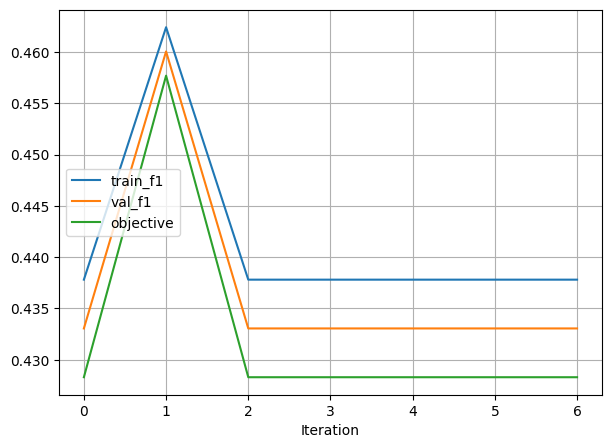

| 7         | 0.4283    | 0.07912   | 0.6014    | 5.9       | 0.4963    | 5.905     | 2.422     | 0.2698    | 50.0      | 0.8471    |


In [39]:
#logger = JSONLogger(path="./logs.json")
#optimizer.subscribe(Events.OPTIMIZATION_STEP, logger)

optimizer.maximize(
    init_points=2,
    n_iter=5,
)

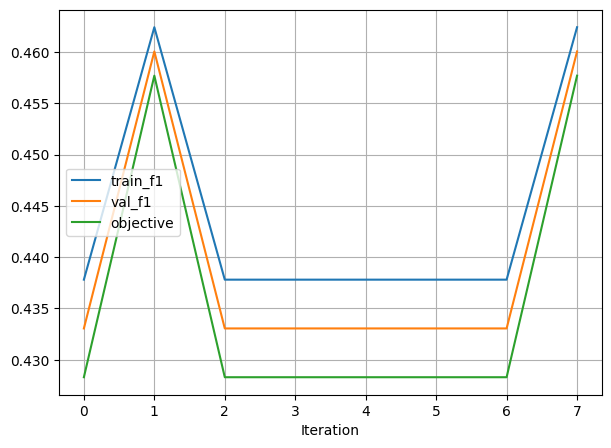

In [40]:
best_model, best_result = train_and_evaluate(**optimizer.max["params"])

In [41]:
test_preds = best_model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, test_preds)

0.6098922139037937

In [35]:
best_model.fit(X, y)

Pipeline(steps=[('data_pipeline',
                 Pipeline(steps=[('data_processor',
                                  ColumnTransformer(transformers=[('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    KNNImputer(n_neighbors=8)),
                                                                                   ('scaler',
                                                                                    MinMaxScaler()),
                                                                                   ('LDA_feature',
                                                                                    LDATransformer())]),
                                                                   Index(['RIESGOS', 'PESO', 'TALLA', 'TSISTOLICA', 'TDIASTOLICA', 'mes_6',
       'mes_5', 'mes_4', 'mes_3', 'mes_2', 'mes_1', 'valor_servicio',
       'IV_N...
                                                                   OneHotEncoder(handle_unknown='ignore'),
                                                                   ['GENERO',
                                                                    'ESTADO_CIVIL',
                                                                    'CESION',
                                                                    'CANCER_MAMA_FAMILIAR',
                                                                    'CANCER_OTRO_SITIO',
                                                                    'CANCER_OTRO_SITIO_FAMILIAR',
                                                                    'CEREBRAL_FAMILIAR',
                                                                    'atencion_nutricion'])]))])),
                ('model',
                 MLPClassifier(alpha=0.10642794547977139, batch_size=16,
                               early_stopping=True, hidden_layer_sizes=[8, 4],
                               learning_rate_init=0.008698159126584545,
                               max_iter=50, random_state=42))])

In [36]:
optimizer.max["params"]

{'imputer_strategy': 0.5593641233259324,
 'knn_imputer': 0.6128341180464585,
 'knn_imputer_k': 8.00741215202442,
 'model_alpha': 0.10642794547977139,
 'model_batch_size': 4.146054083733453,
 'model_hidden_layer_size_exp': 3.4044201806033625,
 'model_lr_init': 0.008698159126584545,
 'model_max_iter': 50.0,
 'scaler_choice': 0.010498378590719337}

In [37]:
with open("best_model_NN.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [38]:
test_preds = best_model.predict_proba(X_test)[:, 1]
train_preds = best_model.predict_proba(X_train)[:, 1]
ths = np.linspace(0, 1, 1000)
best_th = ths[np.argmax([f1_score(y_test, test_preds>th) for th in ths])]
best_th

0.43543543543543545

In [39]:
test_f1 = f1_score(y_test, test_preds>best_th)
train_f1 = f1_score(y_train, train_preds>best_th)
print(f"Train f1: {train_f1}")
print(f"Test f1: {test_f1}")

Train f1: 0.5134099616858238

Test f1: 0.5925925925925926


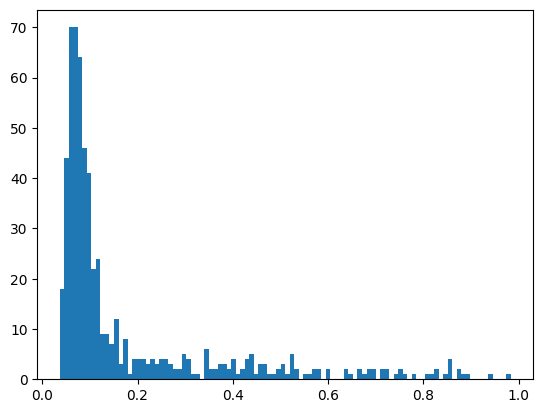

In [40]:
plt.hist(test_preds, bins=100)
plt.show()

# Submission

In [41]:
test_df = pd.read_parquet(osp.join(DATA_DIR, "df_test.parquet"))
submission_pred = best_model.predict_proba(test_df)[:, 1]
submission_pred_bool = submission_pred>best_th
submission_pred_int = [int(item) for item in submission_pred_bool]
submission = pd.DataFrame(data=dict(ID=test_df.index, Target=submission_pred_int))
submission.to_csv("submission_NN.csv", index=False)